In [1]:
from typing import TypedDict, List, Annotated
import operator
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, MessagesState, START, END
from IPython.display import Image, display

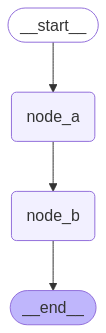

In [2]:
class State(TypedDict):
    value: Annotated[List[str], operator.add]

def node_a(state: State):
    return {"value": ["a"]}

def node_b(state: State):
    return {"value": ["b"]}

workflow = StateGraph(State)

workflow.add_node(node_a)
workflow.add_node(node_b)

workflow.add_edge(START, "node_a")
workflow.add_edge("node_a", "node_b")
workflow.add_edge("node_b", END)

graph = workflow.compile()

display(
    Image(
        graph.get_graph().draw_mermaid_png()
    )
)

In [4]:
graph.invoke({"value":[]})

{'value': ['a', 'b']}

**Checkpoints**

In [5]:
checkpointer = MemorySaver()
graph = workflow.compile(checkpointer=checkpointer)

In [6]:
config = {"configurable": {"thread_id": "1"}}
graph.invoke({"value": []}, config)

{'value': ['a', 'b']}

In [7]:
config = {"configurable": {"thread_id": "1"}}
graph.invoke({"value": []}, config)

{'value': ['a', 'b', 'a', 'b']}

In [8]:
config = {"configurable": {"thread_id": "2"}}
graph.invoke({"value": []}, config)

{'value': ['a', 'b']}

In [11]:
config = {"configurable": {"thread_id": "3"}}
graph.invoke({"value": []}, config)

{'value': ['a', 'b', 'a', 'b', 'a', 'b']}

In [12]:
list(graph.get_state_history({"configurable": {"thread_id": "1"}}))

[StateSnapshot(values={'value': ['a', 'b', 'a', 'b']}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f00d1fe-fe31-6396-8006-82f751412c65'}}, metadata={'source': 'loop', 'writes': {'node_b': {'value': ['b']}}, 'thread_id': '1', 'step': 6, 'parents': {}}, created_at='2025-03-30T04:32:06.826873+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f00d1fe-fe26-65fe-8005-3eef4af09d95'}}, tasks=()),
 StateSnapshot(values={'value': ['a', 'b', 'a']}, next=('node_b',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f00d1fe-fe26-65fe-8005-3eef4af09d95'}}, metadata={'source': 'loop', 'writes': {'node_a': {'value': ['a']}}, 'thread_id': '1', 'step': 5, 'parents': {}}, created_at='2025-03-30T04:32:06.822427+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f00d1fe-fe22-6bc0-8004-20b6f079332e'}}, tasks=(PregelTask(id='c4f0098d-

In [13]:
list(graph.get_state_history({"configurable": {"thread_id": "2"}}))

[StateSnapshot(values={'value': ['a', 'b']}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f00d1ff-a210-6bb0-8002-e1a1f216d613'}}, metadata={'source': 'loop', 'writes': {'node_b': {'value': ['b']}}, 'thread_id': '2', 'step': 2, 'parents': {}}, created_at='2025-03-30T04:32:24.010217+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f00d1ff-a20d-6064-8001-4f6f4c8d4cfa'}}, tasks=()),
 StateSnapshot(values={'value': ['a']}, next=('node_b',), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f00d1ff-a20d-6064-8001-4f6f4c8d4cfa'}}, metadata={'source': 'loop', 'writes': {'node_a': {'value': ['a']}}, 'thread_id': '2', 'step': 1, 'parents': {}}, created_at='2025-03-30T04:32:24.008698+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f00d1ff-a20a-6562-8000-49067a7c8f9a'}}, tasks=(PregelTask(id='9b11294d-58c4-0c0d-0083-f516c